# C# 9-12: Что нового в языке?

### Сроки поддержки

![sberv](https://dottutorials.net/static/a1a45cf23ace8388d301ac6b3a169e7a/e5715/future-dotnet-1.png)




# C# 9 и версия .NET 5

### Атрибуты локальных функций

In [6]:
using System.Diagnostics.CodeAnalysis;

public void Demo()
{
    static bool IsValid([NotNullWhen(returnValue: true)] string? str)
    {
        return !string.IsNullOrEmpty(value: str);
    }

    string? myStr = null;
    if (IsValid(str: myStr))
    {
        int myStrLength = myStr.Length;
            Console.WriteLine(value: myStrLength);
    }

    string? myStr2 = "Hello";
    if (IsValid(str: myStr2))
    {
        int myStr2Length = myStr2.Length;
        Console.WriteLine(value: myStr2Length);
    }
}

Demo();

Error: System.NullReferenceException: Object reference not set to an instance of an object.
   at Submission#7.Demo()
   at Submission#7.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)

### Переопределение возвращаемого типа у метода

In [ ]:
public class CovariantReturnTypes
{
    private abstract class BaseClass
    {
        public abstract Shape GetShape();
    }

    private class ChildClass : BaseClass
    {
        // класс Square должен быть наследником Shape
        public override Square GetShape()
        {
            throw new NotImplementedException();
        }
    }

    private abstract class Shape
    {

    }

    private class Square : Shape
    {

    }
}

### Расширение частичных методов

In [ ]:
public class ExtendingPartialMethods
{
    private partial class MyClass
    {
        public partial string GetMessage(int param);
    }

    private partial class MyClass
    {
        public partial string GetMessage(int param)
        {
            return $"Message: {param}.";
        }
    }
    
    public void Demo()
    {
        MyClass myClass = new MyClass();
        Console.WriteLine(value: myClass.GetMessage(param: 1));
    }
}

### Расширение GetEnumerator

In [7]:
using System.Collections.Generic;

public static class MyExtensions
{
    public static IEnumerator<T> GetEnumerator<T>(this ValueTuple<T, T, T> source)
    {
        yield return source.Item1;
        yield return source.Item2;
        yield return source.Item3;
    }
}

public class ExtensionGetEnumerator
{
    public void Demo()
    {
        (int, int, int) valueTuple = (1, 2, 3);
        foreach (int value in valueTuple)
        {
            Console.WriteLine(value: value);
        }
    }
}

Error: (5,34): error CS1109: Extension methods must be defined in a top level static class; MyExtensions is a nested class
(18,31): error CS1579: foreach statement cannot operate on variables of type '(int, int, int)' because '(int, int, int)' does not contain a public instance or extension definition for 'GetEnumerator'

### InitOnlySetters

In [7]:
public class InitOnlySetters
{
    public void Demo()
    {
        var f = new Fancy { Name = "Otus" };
        Console.WriteLine(f.Name);
        //f.Name = "Foo";
        Console.WriteLine(f.Name);
    }

    class Fancy
    {
        private readonly string _name;
        public string Name
        {
            get
            {
                return _name;
            }

            init
            {
                Console.WriteLine("Hello");
                _name = Name;
            }
        }
    }
}

var a = new InitOnlySetters();
a.Demo();

Hello



### Lambda discard parameters

In [9]:
public class LambdaDiscardParameters
{
    private static void ShowMessage(Func<int, string, string> convert)
    {
        string result = convert(arg1: 100, arg2: "Hello world!");
        Console.WriteLine(value: result);
    }

    public void Demo()
    {
        ShowMessage(convert: (_, _) => "New message");
    }
}

var a = new LambdaDiscardParameters();
a.Demo();

New message


### Pattern Matching

In [11]:
class Engine
{
    public string Name { get; set; }
}

class FancyCar
{
    public Engine Engine { get; set; }
}

private class Shape
{
    public decimal Area { get; set; }
    public bool IsColored { get; set; }
}

private class Square : Shape
{

}

private class Triangle : Shape
{

}

private class Circle : Shape
{

}

private enum TimeOfTheDay
{
    Morning,
    Afternoon,
    Evening,
    Night
}

In [10]:
var s = new Square();

// Проверка на тип
Square square = new Square();
if (square is not Shape)
{
    // some code
}

// Проверки свойств
if (square is { IsColored: true, Area: > 0 })
{
    // some code
}
    
// Раньше было
if (square.IsColored && square.Area > 0)
{
    // some code
}

if (square is { Area: > 0 and (< 100 or 5) })
{
    // some code
}



In [12]:
static decimal CalculateToll(object shape) =>
    shape switch
    {
        Square sq => 2.00m,
        Circle _ => 3.00m, // В C# 8.0 переменную можно не объявлять (discard pattern)
        Triangle => 5.00m, // В C# 9.0 можно вообще ничего не указывать
            // Хоть что не равное null
        { } => throw new ArgumentException(message: "Unknown shape type", paramName: nameof(shape)),
            // Если пришло null
        null => throw new ArgumentNullException(paramName: nameof(shape))
    };

Console.WriteLine(value: CalculateToll(shape: new Triangle())); // 5.00

5.00


In [13]:
static decimal CalculateToll(object shape) =>
    shape switch
    {
        // Тут можно не боятся NullreferenceException,
        // т.к. свойства будут проверятся если shape не null и экземпляр Square
        Square { Area: > 200 } => 2.00m + 1.00m,
        Square => 2.00m,

            // Можно писать выражения
        Triangle triangle when (triangle.Area + 5 == 120) => 6.00m,
        // Triangle { Area: 115 } => 6m,
        Triangle => 5.00m,

        // Вложенные Switch Expression
        Circle circle => circle.Area switch
        {
            80 => 1.00m,
            90 => 2.00m,
            _ => 3.00m
        }
    };

Console.WriteLine(value: CalculateToll(shape: new Square() { Area = 240 })); // 3.00
Console.WriteLine(value: CalculateToll(shape: new Triangle() { Area = 115 })); // 6.00
Console.WriteLine(value: CalculateToll(shape: new Circle() { Area = 90 })); // 2.00
Console.WriteLine(value: CalculateToll(shape: new Circle())); // 3.00

3.00
6.00
2.00
3.00


In [14]:
static bool IsWeekDay(DateTime date) =>
    date.DayOfWeek switch
    {
        DayOfWeek.Saturday => false,
        DayOfWeek.Sunday => false,
        _ => true
    };

// Определение времени суток
static TimeOfTheDay GetTimeBand(DateTime date) =>
    date.Hour switch
    {
        < 6 or > 19 => TimeOfTheDay.Night,
        < 10 => TimeOfTheDay.Morning,
        < 16 => TimeOfTheDay.Afternoon,
        _ => TimeOfTheDay.Evening,
    };

// Расчет коэффициента в зависимости от дня недели и времени суток 
static decimal PeakTimePremiumFull(DateTime date) =>
    (IsWeekDay(date: date), GetTimeBand(date: date)) /* кортеж */ switch
    {
        // Сопоставление идет по-порядку и будет закончено как только будет найден подходящий вариант
        (true, TimeOfTheDay.Morning) => 2.00m,
        (true, TimeOfTheDay.Afternoon) => 1.50m,
        (true, TimeOfTheDay.Night) => 0.75m,
        (false, _) => 1.75m, // Можно применять discard pattern
        _ => 1.0m
    };

Console.WriteLine(value: PeakTimePremiumFull(date: new DateTime(year: 2021, month: 2, day: 8, hour: 9, minute: 0, second: 0))); // 2.00

2.00


In [15]:
static string IsFastCar(FancyCar car)
{
    if (car is { Engine.Name: "V8" })
    {
        return "Yes";
    }
    return "No";
}

Console.WriteLine(IsFastCar(new() { Engine = new() { Name = "V8" } }));

Yes


### Записи

In [10]:
/*
* Записи упрощают создание неизменяемых ссылочных типов.
* Записи занимают промежуточное место межу классами и структурами.
* Удобны для создания DTO.
* На уровне IL кода это классы, но оптимизированные для многопоточной среды.
*/

private record Product
{
    public int Id { get; }
    public string Description { get; init; }


    public Product(int id, string description)
    {
        (Id, Description) = (id, description);
    }
}

private record Vehicle : Product
{
    public int MaxSpeed { get; }

    public Vehicle(int id, string description, int speed)
        : base(id: id, description: description)
    {
        MaxSpeed = speed;
    }
}

// Short syntax

/*
* Компилятор сам создаст конструктор и свойства
*/

private record Car(
    int Id, 
    string Description, 
    object Test,
    int MaxSpeed);


/*
* К сокращенной записи можно добавлять методы
*/

private record Bus(int Id, string Description, int MaxSpeed)
    : Vehicle(id: Id, description: Description, speed: MaxSpeed)
{
    public override string ToString()
    {
        return "New result";
    }
}

private record MyRecord
{
    public string Name { get; }
    public MyRecord(string name) => Name = name;
}

In [14]:
Product product1 = new Product(id: 1, description: "Some description");
Product product2 = new Product(id: 1, description: "Some description");

var car1 = new Car(Id: 1, Description: "Some description", Test: (Object)Guid.Parse(Guid.Empty.ToString()), MaxSpeed: 3);
var car2 = new Car(Id: 1, Description: "Some description", Test: (Object)Guid.Parse(Guid.Empty.ToString()), MaxSpeed: 3);


/*
* Сравнение в record происходит по значением всех полей (включая приватные), а не по ссылкам как в классах
* Переопределено сравнение.
*/
Console.WriteLine(value: car1 == car2); // true

True


In [ ]:
Product product = new Product(id: 1, description: "Some description");
Vehicle vehicle = new Vehicle(id: 1, description: "Some description", speed: 120);

/*
* Сравнение происходит не только по всем полям, но и по типу.
*/
Console.WriteLine(value: product == vehicle); // false

In [ ]:
Product product = new Product(id: 1, description: "Some description");
MyRecord record = new MyRecord(name: "Some name");

/*
* Сравнение разных типов записей вообще недопустимо
*/

Console.WriteLine(product == record); // ERROR

In [2]:
Product product = new Product(id: 1, description: "Some description");


Console.WriteLine(value: product); // Product { Id = 1, Description = Some description }

Product { Id = 1, Description = Some description }


In [9]:
Product? product1 = new Product(id: 1, description: "Some description");

/*
* Создание модификации записи с помощью with
*/

Product? product2 = product1 with
{
    Description = "New description"
};

Console.WriteLine(value: product2); // Product { Id = 1, Description = New description }

Product { Id = 1, Description = New description }


In [ ]:
Bus bus = new Bus(Id: 1, Description: "Some description", MaxSpeed: 90);

/*
* При сокращенном определении записей также создается и деконструктор
*/

(int id1, string? description, _) = bus;

Console.WriteLine(value: id1); // 1
Console.WriteLine(value: description); // Some description
//Console.WriteLine(value: maxSpeed); // 90

### Статические лямбда-выражения (анонимные функции)

In [15]:
public static void ShowMessage(Func<string, string> convert)
{
    Console.WriteLine(value: convert(arg: "Hello World!"));
}

public void Demo()
{
    string underline = "_";
    ShowMessage(convert: myStr => myStr.Replace(oldValue: " ", newValue: underline));

    //   ShowMessage(convert: static myStr => myStr.Replace(oldValue: " ", newValue: underline)); // A static anonymous function cannot contain a reference to 'underline'

    const string dash = "-";
    ShowMessage(convert: static myStr => myStr.Replace(oldValue: " ", newValue: dash));
}

Demo();

Hello_World!
Hello-World!


### Target-Typed Conditional Expression

In [ ]:
// Явного приведение к int? не требуется
int? number = false ? 1 : null;

### Определение типа из контекста

In [20]:
public class MyClass
{
    public MyClass()
    {

    }

    public MyClass(int a)
    {
        SomeProperty = a;
    }
    public int SomeProperty { get; set; }
}

In [ ]:
// Полная запись
MyClass myClass1 = new MyClass();

// Благодаря var более компактно
var myClass2 = new MyClass();

// Теперь доступен обратный синтаксис
MyClass myClass3 = new();

In [ ]:
// Применение в методах
static MyClass LocalMethod(DateTime dt)
{
    return new();
}

MyClass myClass = LocalMethod(dt: new(year: 2021, month: 2, day: 10));

In [ ]:
// Применение в определении коллекций
List<MyClass> list = new()
{
    new() { SomeProperty = 1 },
    new() { SomeProperty = 2 },
    new() { SomeProperty = 3 }
};

### Top-Level Statement

In [ ]:
using System;


Console.WriteLine("ada");

Console.WriteLine(value: args.Length);
ShowMessage(message: "Some method!");
Show.Message(message: "Some method from class!");
Console.ReadLine();

static void ShowMessage(string message)
{
    Console.WriteLine(value: message);
}

internal class Show
{
    internal static void Message(string message)
    {
        Console.WriteLine(value: message);
    }
}

### Модульные инициализаторы

In [4]:
using System.Runtime.CompilerServices;

class Program
    {
        [ModuleInitializer]
        public static void InitializerMethod1()
        {
            Console.WriteLine(value: "InitializerMethod1");
        }


        [ModuleInitializer]
        public static void InitializerMethod2()
        {
            Console.WriteLine(value: "InitializerMethod2");
        }

        static void Main(string[] args)
        {
            Console.WriteLine(value: "Main");
            Console.ReadLine();
        }
    }

InitializerMethod1
InitializerMethod2


# C# 10 и версия .NET 6

### File-scoped namespace declaration (Объявление пространства имен в пределах файла)

Top-Level Statement из C# 9 получил свое дальнейшее развитие:

Program.cs для C# <9:


In [1]:
using System;

namespace MyApp // Note: actual namespace depends on the project name.
{
    internal class Program
    {
        static void Main(string[] args)
        {
            Console.WriteLine("Hello World!");
        }
    }
}

Error: (3,1): error CS7021: Cannot declare namespace in script code

Program.cs для C# 9+

In [2]:
Console.WriteLine("Hello World");

Hello World


Развитие этой идеи для размещения в нескольких файлах:

In [ ]:
namespace TestApp.Namespace;

public class Book
{
    public string Title;
    public Author Author;
    public Book (string title, Author author) => (Title, Author) = (title, author);
}

### Расширенные шаблоны свойств (Extended property patterns)

Начиная с C# 10 можно ссылаться на вложенные свойства или поля в шаблоне свойства

Расширим класс книги новым методом.
Вариант для предыдущих версий:

In [ ]:
public class Author
{
    public string FirstName;
    public string LastName;
}

public class Book
{
    public string Title;
    public Author Author;
    public Book (string title, Author author) => (Title, Author) = (title, author);

    public static bool DoesHaveDiscount(Book book)
    {
        if (book is {Author: {LastName: "Richter" }} || book is {Author: {LastName: "Price" }}) return true;
        return false;
    }
}

Вариант для C# 10:

In [ ]:
public class Author
{
    public string FirstName;
    public string LastName;
}

public class Book
{
    public string Title;
    public Author Author;
    public Book (string title, Author author) => (Title, Author) = (title, author);

    public static bool DoesHaveDiscount(Book book)
    {
        if (book is {Author.LastName: "Richter" } || book is {Author.LastName: "Price" }) return true;
        return false;
    }
}

### Constant interpolated strings 

const могут быть инициализированы с помощью интерполяции строк, если все заполнители являются константными строками. Выражения заполнителей не могут быть числовыми константами, так как эти константы преобразуются в строки во время выполнения

In [3]:
const string ThankYou = "Спасибо за покупку.";
const string ThankYouExtended = $"{ThankYou} Уходите еще.";
Console.WriteLine(ThankYouExtended);

Спасибо за покупку. Уходите еще.


### Record-структуры
Record-типы неизменяемы (Immutable). Record-классы добавлены в C# 9, в С# 10 теперь поддерживаются immutable-структуры. 

In [ ]:
public record struct Person
{
    public string Name { get; }
    public Person(string name) => Name = name;
}

### Конструктор для record-структур 

In [ ]:
public record struct Person (string Name);

### Конструктор без параметров для структур

In [16]:
public struct Person
{
    public string Name { get; }
    public Person(string name) => Name = name;
    public Person()
    {
        Name = "Акакий";
    }
}

var p1 = new Person("Тест");
Console.WriteLine(p1.Name);

var p2 = default(Person);
Console.WriteLine(p2.Name);

var p3 = new Person();
Console.WriteLine(p3.Name);



Тест

Акакий


### With для структур

Выражение with, доступное в C# 9.0 и более поздних версиях, создает копию своего операнда с измененными заданными свойствами и полями. 
В C# 9.0 левый операнд в выражении with должен иметь тип записи. 
Начиная с C# 10, левый операнд выражения with также может иметь тип структуры или анонимный тип.

In [ ]:
public record struct NamedPoint(string Name, int X, int Y);

var p1 = new NamedPoint("A", 0, 0);
Console.WriteLine($"{nameof(p1)}: {p1}"); 

var p2 = p1 with { Name = "B", X = 5 };
Console.WriteLine($"{nameof(p2)}: {p2}");

### Запечатывание ToString

In [ ]:
public record Person
{
    public string Name { get; }
    public Person(string name) => Name = name;
    public sealed override string ToString()
    {
        return typeof(Person).Name;
    }
}

public record User: Person
{
    public User(string name):base(name){}
    public override string ToString()
    {
        return typeof(User).Name;
    }
}

### Улучшение деконструкции

In [ ]:
public class Author
{
    public string FirstName;
    public string LastName;

    public Author(string firstName, string lastName)
    {
        FirstName = firstName;
        LastName = lastName;
    }

    public void Deconstruct(out string firstName, out string lastName)
    {
        firstName = FirstName;
        lastName = LastName;
    }
}

var author = new Author("Mikhail","Bulgakov");

(string name1, string lastName1) = author;
Console.WriteLine(name1);
Console.WriteLine(lastName1);


string name2 = string.Empty;
string lastName2 = string.Empty;
(name2, lastName2) = author;
Console.WriteLine(name2);
Console.WriteLine(lastName2);


//--C# 10--
(name2, var lastName3) = author;
Console.WriteLine(name2);
Console.WriteLine(lastName3);

### Глобальные директивы Using

In [ ]:
global using System.Collections.Generic;
global using System.Linq;

# C# 11 и версия .NET 7

### Паттерны списков

In [ ]:
Console.WriteLine(GetNumber(new[] { 2, 3, 5 }));        // 1
Console.WriteLine(GetNumber(new[] { 2, 4, 5 }));        // 2
Console.WriteLine(GetNumber(new[] { 2, 3, 4, 5 }));     // 3
Console.WriteLine(GetNumber(new[] { 1, 2, 3 }));        // 4
Console.WriteLine(GetNumber(new int[] { }));            // 4
 
int GetNumber(int[] values) => values switch
{
    [2, 3, 5] => 1,
    [2, _, 5] => 2,
    [2, .., 5] => 3,
    [..] => 4
};

### Обобщения в атрибутах

In [ ]:
class C
{
    [Reader<int>]
    public void M() 
    {
    }
}
 
class ReaderAttribute<T> : Attribute
{
}

### Многострочные строки
С помощью трех пар двойных кавычек можно оформить многострочный текст, в том числе с применением интерполяции:

In [ ]:
Print();
PrintValue("hello");
 
void Print()
{
    string text = """
              <element attr="content">
                <body>
                </body>
              </element>
              """;
    Console.WriteLine(text);
}
 
void PrintValue(string val)
{
    string text = $"""
              <element attr="content">
                <body>
                {val}
                </body>
              </element>
              """;
    Console.WriteLine(text);
}

### Строковые литералы UTF-8
C# 11 позволяет автоматически сконвертировать строки с символами UTF-8 в их бинарное представление.

In [ ]:
// C# 10
byte[] message1 = System.Text.Encoding.UTF8.GetBytes("hello");
 
// C# 11
byte[] message2 = "hello";

### String interpolation (new line)

In [ ]:
int[] arrayToFilter = { 1, 2, 3, 4, 56, 241, 12, 4712, 4888812, 400012 };
Console.WriteLine($"Array is [{string.Join(", ", arrayToFilter
    .Where(x => x % 2 == 0))}]");

### INumber

In [21]:
using System.Numerics;

var ints = new[] { 1, 2, 3, 4, 5, 6 };
var doubles = new[] { 4.0, 44.0 };

double Avg<T>(T[] numbers)
    where T : INumber<T>
{

    T sum = T.Zero;
    foreach (var n in numbers)
    {
        sum += n;
    }

    var l1 = double.CreateChecked(numbers.Length);
    var s1 = double.CreateChecked(sum);
    return numbers.Length == 0 ? 0.0 : s1 / l1;
}

### File Class

In [ ]:
file class FileClass
{
    static void Main(string[] args)
    {
        Console.WriteLine("Hello World!");
    }
}

# C# 12 и версия .NET 8

### Primary constructors

In [ ]:
public class Person(string name, int age)
{
    public Person(string name) : this(name, 18) { }
    public string Name => name;
    public int Age => age;
 
    public override string ToString() => $"name: {name}, age: {age}";
}

### Выражения коллекции

In [17]:
int[] row0 = [1, 2, 4];
int[] row1 = [4, 5, 6];
int[] row2 = [7, 8, 9];
int[] single = [..row0, ..row1, ..row2];
foreach (var element in single)
{
    Console.Write($"{element}, ");
}
// output:
// 1, 2, 3, 4, 5, 6, 7, 8, 9,

Error: (1,14): error CS1525: Invalid expression term '['
(2,14): error CS1525: Invalid expression term '['
(3,14): error CS1525: Invalid expression term '['
(4,16): error CS1525: Invalid expression term '['

### Параметры лямбда-кода по умолчанию

In [18]:
var welcome = (string message = "hello")=> Console.WriteLine(message);
 
welcome("hello world"); // hello world
welcome();              // hello

Error: (1,31): error CS8652: The feature 'lambda optional parameters' is currently in Preview and *unsupported*. To use Preview features, use the 'preview' language version.

### Псевдоним любого типа

In [22]:
using People = System.Collections.Generic.List<Person>;
 
People people = new(){ new ("Tom", 38), new ("Bob", 42) };

public record Person(string Name, int Age);

In [ ]:
using user = (string, int);
user tom = ("Tom", 38);
Console.WriteLine(tom);     // (Tom, 38)

### Методы для работы с случайностью

In [ ]:
private static ReadOnlySpan<Button> s_allButtons = new[]
{
    Button.Red,
    Button.Green,
    Button.Blue,
    Button.Yellow,
};


Button[] thisRound = Random.Shared.GetItems(s_allButtons, 31);

In [ ]:
YourType[] trainingData = LoadTrainingData();
Random.Shared.Shuffle(trainingData);

### Типы, ориентированные на производительность

In [ ]:
private static readonly FrozenDictionary<string, bool> s_configurationData =
    LoadConfigurationData().ToFrozenDictionary(optimizeForReads: true);

### Использование Сервисов по Ключу

In [24]:
public interface IVehicle
{
  int NoOfWheels { get; }
}

public class Car : IVehicle
{
  public int NoOfWheels => 4;
}
public class Bike : IVehicle
{
  public int NoOfWheels => 2;
}

In [ ]:
builder.Services.AddKeyedScoped<IVehicle, Car>("car");
builder.Services.AddKeyedScoped<IVehicle, Bike>("bike");

In [ ]:
[ApiController]
public class VehicleApiController : Controller
{
  [HttpGet("carweels")]
  public IActionResult CarWheels(
    [FromKeyedServices("car")] IVehicle v)
  {
    return Ok(new {
      CarWheels = v.NoOfWheels,
    });
  }
}

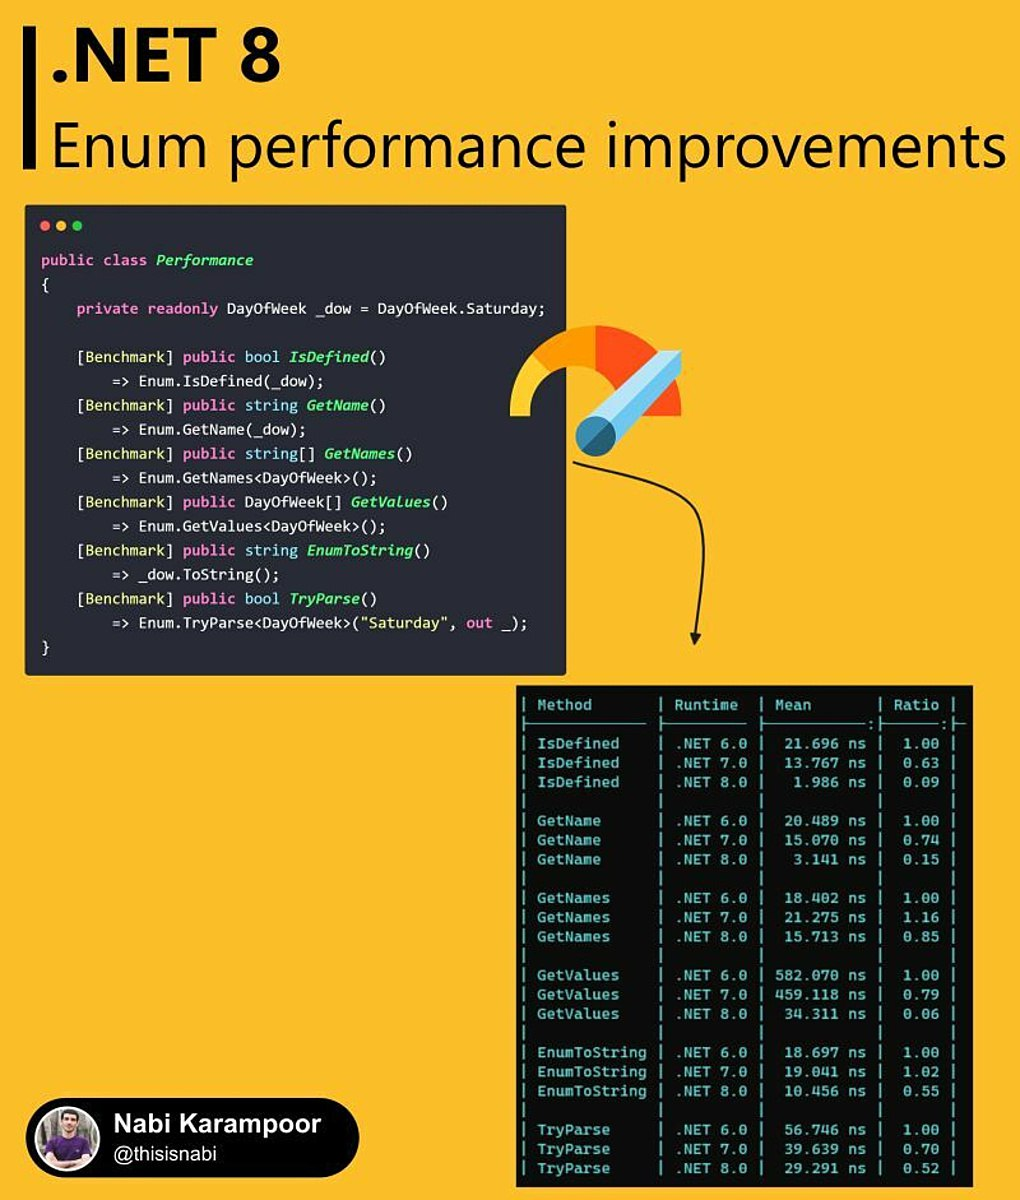